# Linear Regression:

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch import optim
import time

In [65]:
torch.cuda.set_device(0)

In [67]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Creating a Class for Dataset:

In [2]:
class Data(Dataset):
    def __init__(self, train = True):
        self.x = torch.arange(-3,3,0.1).view(-1,1)
        self.f = 3*self.x + 1
        self.len = self.x.shape[0]
        self.y = self.f + torch.randn(self.x.size())
        if train==True:
            self.y[0] = 0
            self.y[50:55] = 20
        else:
            pass
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len
    
dataset = Data() # creating an instance of the object Data

In [3]:
print("Length of Dataset: ", len(dataset))
print("First 4 data points in Dataset: ", dataset[:4])

Length of Dataset:  60
First 4 data points in Dataset:  (tensor([[-3.0000],
        [-2.9000],
        [-2.8000],
        [-2.7000]]), tensor([[ 0.0000],
        [-9.2250],
        [-7.2411],
        [-8.0600]]))


### Creating a Train and Val split:

In [4]:
train_data = Data()
val_data = Data(train=False)

### Creating the Linear Regression Model:

In [5]:
class LR(nn.Module):
    def __init__(self, ip_size, op_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(ip_size, op_size)
    
    def forward(self, x):
        return self.linear(x)

### Creating a DataLoader:

In [19]:
trainloader = DataLoader(dataset=dataset, batch_size=1) 
# batch_size---> 1 for SGD, len(dataset) for Batch, any value bw 1 to len for MiniBatch

### Loss, epochs, val and test errors:

In [20]:
criterion = nn.MSELoss() # Mean Squared Error Loss function

epochs = 10
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
val_error = torch.zeros(len(learning_rates))
test_error = torch.zeros(len(learning_rates))
MODELS = []

### Stochastic Gradient Descent Training:

In [25]:
for i, lr in enumerate(learning_rates):
    model = LR(1,1)
    opti = optim.SGD(model.parameters(), lr = lr)
    
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            opti.zero_grad()
            loss.backward()
            opti.step()
    yhat = model(train_data.x)
    loss = criterion(yhat, train_data.y)
    test_error[i] = loss.item()
    
    yhat = model(val_data.x)
    loss = criterion(yhat, val_data.y)
    val_error[i] = loss.item()
    MODELS.append(model)

### Plotting training and val loss for each LR:

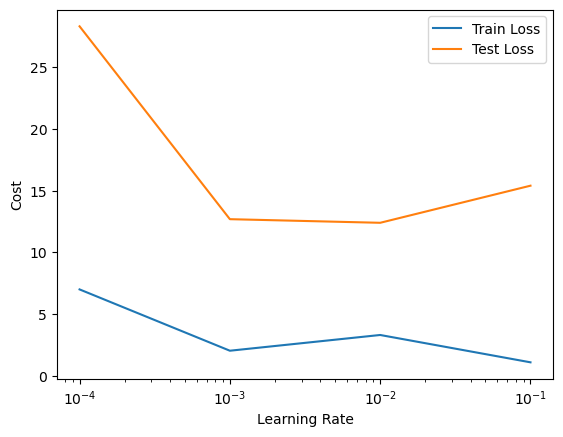

In [27]:
plt.semilogx(np.array(learning_rates), val_error.numpy(), label = "Val Loss")
plt.semilogx(np.array(learning_rates), test_error.numpy(), label = "Test Loss")
plt.ylabel('Cost')
plt.xlabel("Learning Rate")
plt.legend()
plt.show()

**Learning Rate = 0.01 is showing the smallest Train and Test Loss**

In [28]:
good_model = MODELS[2]

### Mini-Batch Gradient Descent:

In [16]:
trainloader = DataLoader(dataset = dataset, batch_size=12)
criterion = nn.MSELoss()
lrs = [0.0001, 0.001, 0.01, 0.1, 1]
train_loss = torch.zeros(len(lrs))
val_loss = torch.zeros(len(lrs))
epochs = 15
MODELS = []

In [17]:
# Training:
for i, lr in enumerate(lrs):
    model = LR(1,1)
    opti = optim.SGD(model.parameters(), lr = lr)
    print(f"Learning Rate = {lr} --->")
    for epoch in range(epochs):
        print(f"\tTraining Epoch {epoch+1}/{epochs}...")
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            opti.zero_grad() # computing the gradiant
            loss.backward() # backpropagation
            opti.step() # weight updation (wt+1 = wt +/- lr*gradient)
        print(f"\tDONE")
    yhat = model(train_data.x)
    trainloss = criterion(yhat, train_data.y)
    train_loss[i] = trainloss.item() # appending the loss for loss plot

    yhat = model(val_data.x)
    valloss = criterion(yhat, val_data.y)
    val_loss[i] = valloss.item()
    print(f"\tDone - Training Loss: {trainloss}; Val Loss: {valloss}")
    MODELS.append(model)
    time.sleep(1)

Learning Rate = 0.0001 --->
	Training Epoch 1/15...
	DONE
	Training Epoch 2/15...
	DONE
	Training Epoch 3/15...
	DONE
	Training Epoch 4/15...
	DONE
	Training Epoch 5/15...
	DONE
	Training Epoch 6/15...
	DONE
	Training Epoch 7/15...
	DONE
	Training Epoch 8/15...
	DONE
	Training Epoch 9/15...
	DONE
	Training Epoch 10/15...
	DONE
	Training Epoch 11/15...
	DONE
	Training Epoch 12/15...
	DONE
	Training Epoch 13/15...
	DONE
	Training Epoch 14/15...
	DONE
	Training Epoch 15/15...
	DONE
	Done - Training Loss: 40.10824966430664; Val Loss: 18.62480354309082
Learning Rate = 0.001 --->
	Training Epoch 1/15...
	DONE
	Training Epoch 2/15...
	DONE
	Training Epoch 3/15...
	DONE
	Training Epoch 4/15...
	DONE
	Training Epoch 5/15...
	DONE
	Training Epoch 6/15...
	DONE
	Training Epoch 7/15...
	DONE
	Training Epoch 8/15...
	DONE
	Training Epoch 9/15...
	DONE
	Training Epoch 10/15...
	DONE
	Training Epoch 11/15...
	DONE
	Training Epoch 12/15...
	DONE
	Training Epoch 13/15...
	DONE
	Training Epoch 14/15...


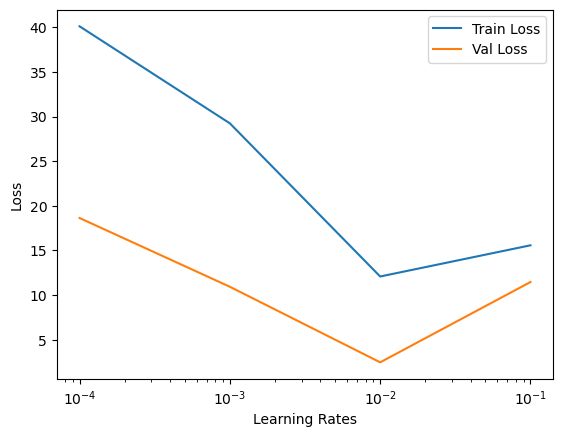

In [18]:
plt.semilogx(np.array(lrs), train_loss.numpy(), label="Train Loss")
plt.semilogx(np.array(lrs), val_loss.numpy(), label="Val Loss")
plt.xlabel("Learning Rates")
plt.ylabel("Loss")
plt.legend()

**Best model found at Learning Rate = 0.01**

In [ ]:
good_model = MODEL[2]

### Batch Gradient Descent:

In [6]:
trainloader = DataLoader(dataset = dataset, batch_size = len(dataset))
epochs = 15
criterion = nn.MSELoss()
lrs = [0.0001, 0.001, 0.01, 0.1, 1]
train_loss = torch.zeros(len(lrs))
val_loss = torch.zeros(len(lrs))
MODELS = []

In [12]:
for i, lr in enumerate(lrs):
    print(f"Learning Rate = {lr}")
    model = LR(1,1)
    opti = optim.SGD(model.parameters(), lr = lr)
    for epoch in range(epochs):
        print(f"\tTraining Epoch {epoch+1}/{epochs}...")
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            opti.zero_grad()
            loss.backward()
            opti.step()
        print("\tDONE!")
            
    yhat = model(train_data.x)
    loss = criterion(yhat, train_data.y)
    train_loss[i] = loss.item()

    yhat = model(val_data.x)
    loss = criterion(yhat, val_data.y)
    val_loss[i] = loss.item()
    MODELS.append(model)
    print(f"\tTraining Loss: {train_loss[i]}; Val Loss: {val_loss[i]}")
    print(f"\tLR {lr} DONE.")
    time.sleep(1)

Learning Rate = 0.0001
	Training Epoch 1/15...
	DONE!
	Training Epoch 2/15...
	DONE!
	Training Epoch 3/15...
	DONE!
	Training Epoch 4/15...
	DONE!
	Training Epoch 5/15...
	DONE!
	Training Epoch 6/15...
	DONE!
	Training Epoch 7/15...
	DONE!
	Training Epoch 8/15...
	DONE!
	Training Epoch 9/15...
	DONE!
	Training Epoch 10/15...
	DONE!
	Training Epoch 11/15...
	DONE!
	Training Epoch 12/15...
	DONE!
	Training Epoch 13/15...
	DONE!
	Training Epoch 14/15...
	DONE!
	Training Epoch 15/15...
	DONE!
	Training Loss: 37.68141555786133; Val Loss: 16.572368621826172
	LR 0.0001 DONE.
Learning Rate = 0.001
	Training Epoch 1/15...
	DONE!
	Training Epoch 2/15...
	DONE!
	Training Epoch 3/15...
	DONE!
	Training Epoch 4/15...
	DONE!
	Training Epoch 5/15...
	DONE!
	Training Epoch 6/15...
	DONE!
	Training Epoch 7/15...
	DONE!
	Training Epoch 8/15...
	DONE!
	Training Epoch 9/15...
	DONE!
	Training Epoch 10/15...
	DONE!
	Training Epoch 11/15...
	DONE!
	Training Epoch 12/15...
	DONE!
	Training Epoch 13/15...
	DO

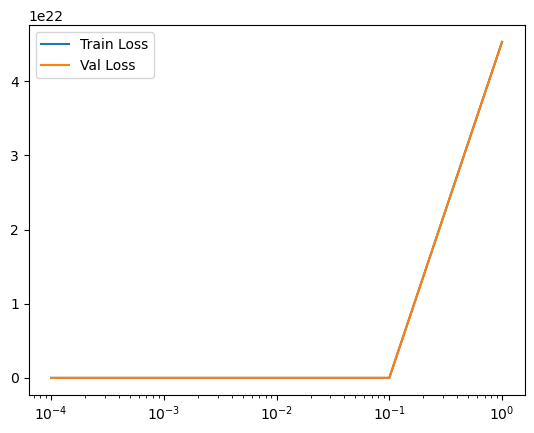

In [13]:
plt.semilogx(np.array(lrs), train_loss.numpy(), label="Train Loss")
plt.semilogx(np.array(lrs), val_loss.numpy(), label = "Val Loss")
plt.legend()
# plt.plot()

**Horrible Performance when Using Batch Gradient Descent**

# Linear Classification / Logistic Regression:

**BINARY CLASSIFICATION USING SIGMOID**

### Create Dataset:

In [2]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-1, 1, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0], 1)
        self.y[self.x[:, 0]>0.2] = 1
        self.len = self.x.shape[0]
        
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return self.len

dataset = Data()

### Creating the Model:

In [3]:
class logistic_reg(nn.Module):
    def __init__(self, n_inputs):
        super(logistic_reg, self).__init__()
        self.linear = nn.Linear(n_inputs, 1)
        
    def forward(self, x):
        yhat = torch.sigmoid(self.linear(x))
        return yhat

### Loss function, Epochs, Learning Rate:

In [4]:
criterion = nn.BCELoss() # Binary Cross Entropy
learning_rate = 2
epochs = 100

### Train Model:

In [14]:
def train(epochs):
    train_loss = []
    for epoch in range(epochs):
        for x,y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            opti.zero_grad()
            loss.backward()
            opti.step()
        yhat = model(dataset.x)
        loss = criterion(yhat, dataset.y)
        train_loss.append(loss.item())
    return train_loss

In [15]:
model = logistic_reg(1)
trainloader = DataLoader(dataset=dataset, batch_size=3)
opti = optim.SGD(model.parameters(), lr = learning_rate)
train_loss = train(epochs)

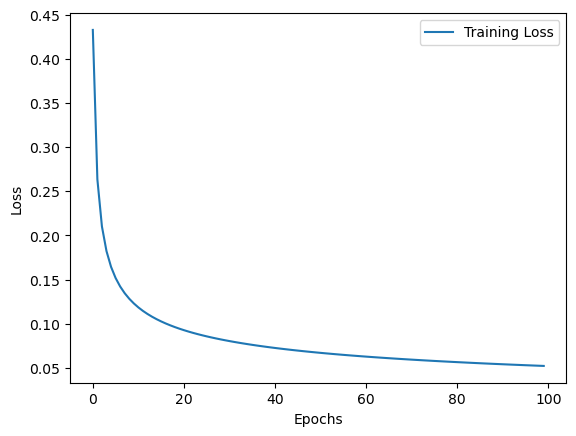

In [16]:
plt.plot(range(epochs), train_acc, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [18]:
yhat = model(dataset.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == dataset.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(1.)


### THREE CLASS CLASSIFICATION USING SOFTMAX:

In [8]:
# Create class for plotting

def plot_data(data_set, model = None, n = 1, color = False):
    X = data_set[:][0]
    Y = data_set[:][1]
    plt.plot(X[Y == 0, 0].numpy(), Y[Y == 0].numpy(), 'bo', label = 'y = 0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y == 1].numpy(), 'ro', label = 'y = 1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y == 2].numpy(), 'go', label = 'y = 2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label = y_l)
        if color == True:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.show()

In [2]:
class Data(Dataset):
    
    def __init__(self):
        self.x = torch.arange(-2,2,0.1).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x>-1.0)[:, 0] * (self.x<1.0)[:, 0]] = 1
        self.y[(self.x>=1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

dataset = Data()

### Building the Softmax Classifier:

In [3]:
model = nn.Sequential(nn.Linear(1,3))
print(model.state_dict())

OrderedDict([('0.weight', tensor([[-0.2490],
        [-0.0752],
        [-0.1517]])), ('0.bias', tensor([ 0.0817, -0.5947, -0.9631]))])


### Training Model

In [4]:
criterion = nn.CrossEntropyLoss()
opti = optim.SGD(model.parameters(), lr = 0.01)
trainloader = DataLoader(dataset = dataset, batch_size = 5)

In [9]:
LOSS = []

def train(epochs):
    for epoch in range(epochs):
        if epoch%50==0:
            plot_data(dataset, model)
        for x,y in trainloader:
            opti.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            opti.step()

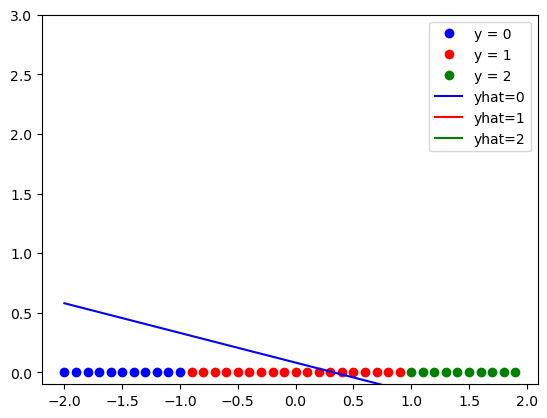

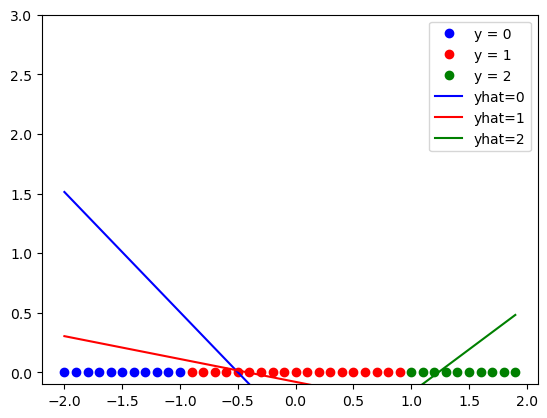

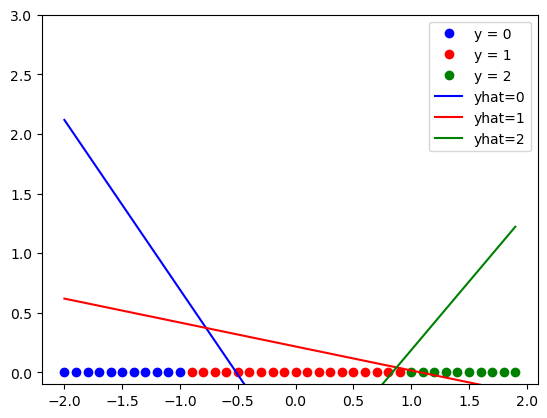

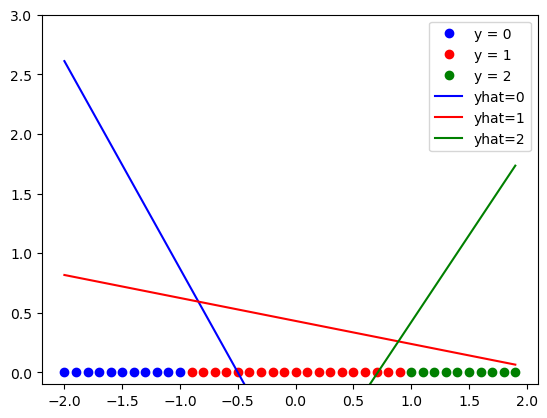

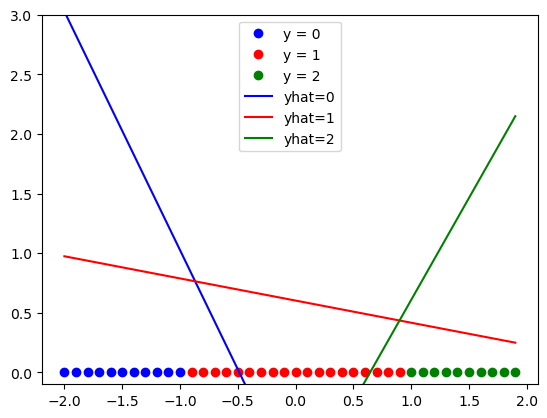

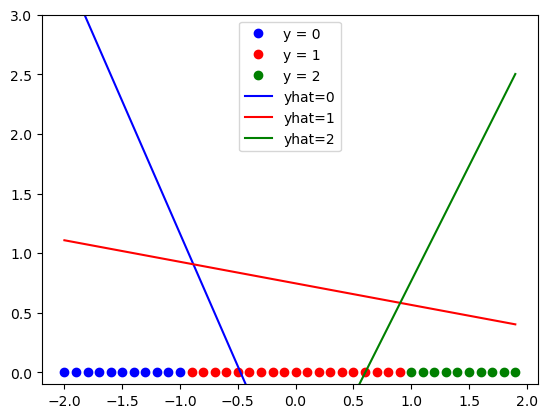

In [10]:
epochs = 300
train(epochs)